<a href="https://colab.research.google.com/github/helijus/TrabalhoAnaliseDados/blob/main/TrabalhoInferenciaHelicassia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #manipulação de dados em formato de dataframe
import numpy as np #biblioteca para operações matemáticas multidimensionais
import seaborn as sns #biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt #biblioteca de visualização de dados
from scipy import stats
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

# Caminho do diretório escolhido
path = "/content/drive/MyDrive/Aulas Anisio"

Mounted at /content/drive


In [ ]:
# Leitura do arquivo
df_militares = pd.read_csv(path + '/age_dataset.csv', sep=',')

df_militares = df_militares.dropna()

## 1. Escolha das Váriáveis e Motivo:

  **Profissão:** Militar

  **Genêro:** Feminino (mais foco) e Masculino

  **Idade de Morte:** Idade em que faleceram

  **Motivo**: Analisar se mulheres que possuem cargos militares tem vida mais longa que homens que pertencem a cargos militares.



###1.1 Legendando os cargos que podem ser considerados do meio militar:

## Profissões do Meio Militar

| Profissão em Português                               | Correspondente em Inglês                              |
|-----------------------------------------------------|-------------------------------------------------------|
| Militar                                             | Military personnel                                                |
| Combatente | Resistance fighter             |
| Oficial                                         | Official                                                |
|
Combatente da resistência francesa                             | French resistance fighter |
| Combatente da Força Aérea                     | Air force officer                              |



In [ ]:
#Filtrando profissões militares
militar_professions = [
    "Military personnel",
    "Resistance fighter",
    "Official",
    "Air force officer",
    "French resistance fighter"
]

In [ ]:
#Listando somente os militares e seus dados
militar = df_militares[df_militares['Occupation'].isin(militar_professions)]

militar.head(30)

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
238,Q2998,Amy Johnson,pioneering English aviator,Female,United Kingdom; United Kingdom of Great Britai...,Military personnel,1903,1941.0,accident,38.0
285,Q4012,Paul von Rennenkampf,Russian general,Male,Russian Empire,Military personnel,1854,1918.0,unnatural death,64.0
519,Q7226,Joan of Arc,French folk heroine and Roman Catholic saint,Female,France,Military personnel,1412,1431.0,capital punishment,19.0
578,Q7357,Emperor Hui of Jin,2nd emperor of the Jin Dynasty (265–420),Male,Western Jin dynasty,Official,259,307.0,homicide,48.0
594,Q7404,Emperor Gong of Jin,emperor of the Jin Dynasty (265–420),Male,China,Military personnel,386,421.0,homicide,35.0
906,Q11697,Andreas Hofer,Tirolean innkeeper and patriot,Male,Austria,Military personnel,1767,1810.0,capital punishment,43.0
1074,Q14060,Erwin Rommel,German field marshal of World War II,Male,Nazi Germany; Weimar Republic; German Empire,Military personnel,1891,1944.0,suicide,53.0
1177,Q15866,Curtis LeMay,American general and politician,Male,United States of America,Air force officer,1906,1990.0,natural causes,84.0
1301,Q18410,Maryse Bastié,French aviator,Female,France,Military personnel,1898,1952.0,accident,54.0
1435,Q21209,Claus Schenk Graf von Stauffenberg,German army officer and aristocrat,Male,Germany,Military personnel,1907,1944.0,capital punishment,37.0


###1.2 Contagem total de cargos militares e contagem separada por genêro

In [ ]:
#Realizando a contagem total de registros referentes à militares
militar['Occupation'].value_counts()

,count
Occupation,
Military personnel,2110
Official,19
Resistance fighter,13
Air force officer,2
French resistance fighter,1


In [ ]:
#Realizando a contagem de militares separado por genero
frequence_militar_gender = pd.crosstab(militar['Occupation'], militar['Gender'])

frequence_militar_gender


Gender,Female,Male,Transgender Male
Occupation,,,
Air force officer,0,2,0
French resistance fighter,1,0,0
Military personnel,65,2044,1
Official,0,19,0
Resistance fighter,5,8,0


##2. Análise Estatística Descritiva

###2.1 Distribuição dos dados:

*   Histogramas
*   Boxplots








#### Histograma Gênero Feminino:

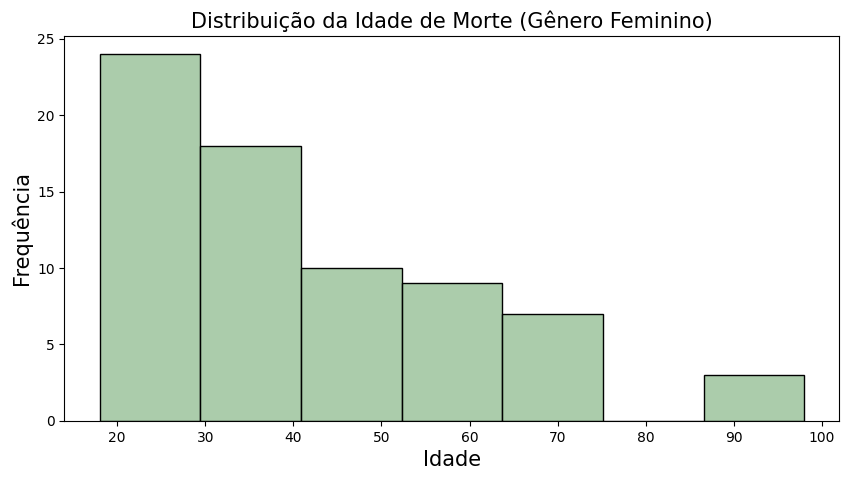

In [ ]:
# Filtrando os dados do gênero feminino
feminino_militares = militar[militar['Gender'] == 'Female']

# Criar o histograma
plt.figure(figsize=(10, 5))
sns.histplot(data=feminino_militares, x='Age of death', log_scale=False, bins=7, color='#8FBC8F')
plt.xlabel('Idade', fontsize=15)
plt.ylabel('Frequência', fontsize=15)
plt.title('Distribuição da Idade de Morte (Gênero Feminino)', fontsize=15)
plt.show()


####Histograma Gênero Masculino:

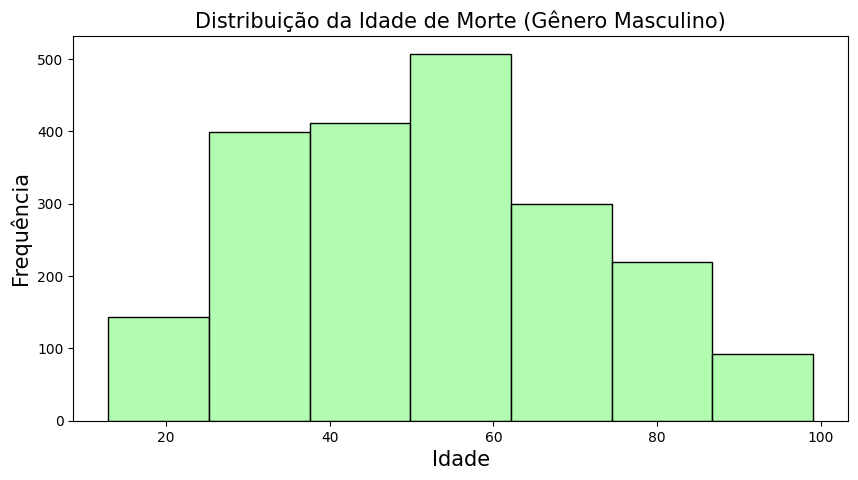

In [ ]:
# Filtrando os dados do gênero masculino
masculino_militares = militar[militar['Gender'] == 'Male']

# Criar o histograma
plt.figure(figsize=(10, 5))
sns.histplot(data=masculino_militares, x='Age of death', log_scale=False, bins=7, color='#98FB98')
plt.xlabel('Idade', fontsize=15)
plt.ylabel('Frequência', fontsize=15)
plt.title('Distribuição da Idade de Morte (Gênero Masculino)', fontsize=15)
plt.show()


#### Boxplots Gênero Feminino

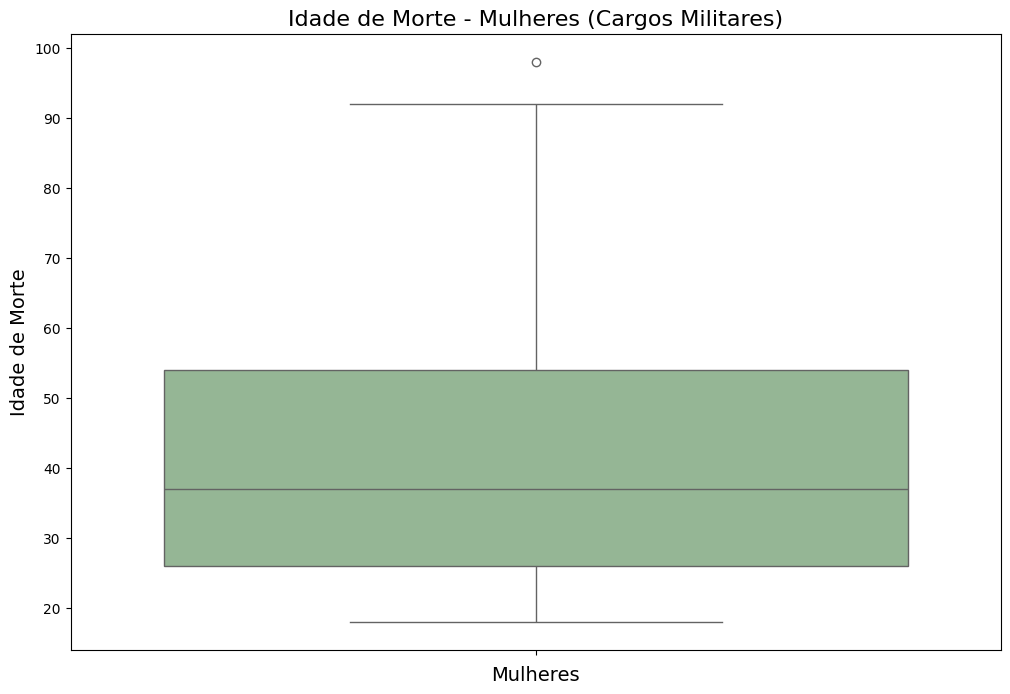

In [ ]:
# Criar o boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=feminino_militares, y='Age of death', color='#8FBC8F')
plt.title('Idade de Morte - Mulheres (Cargos Militares)', fontsize=16)
plt.ylabel('Idade de Morte', fontsize=14)
plt.xlabel('Mulheres', fontsize=14)

#Exibir gráfico
#plt.tight_layout()
plt.show()

#### Boxplots Gênero Masculino - Com média, moda e mediana

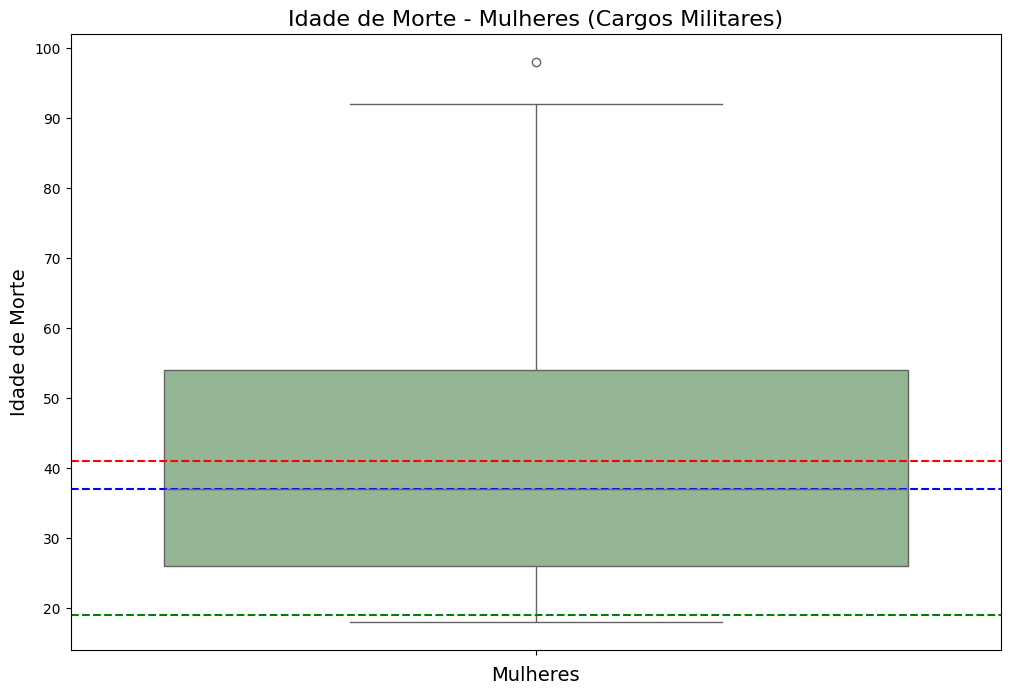

In [ ]:
# Criar o boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=feminino_militares, y='Age of death', color='#8FBC8F')
plt.title('Idade de Morte - Mulheres (Cargos Militares)', fontsize=16)
plt.ylabel('Idade de Morte', fontsize=14)
plt.xlabel('Mulheres', fontsize=14)

media_feminino = feminino_militares['Age of death'].mean()
moda_feminino = feminino_militares['Age of death'].mode()[0]
mediana_feminino = feminino_militares['Age of death'].median()

plt.axhline(media_feminino, color='red', linestyle='--', label=f'Média: {media_feminino:.2f}')
plt.axhline(moda_feminino, color='green', linestyle='--', label=f'Moda: {moda_feminino}')
plt.axhline(mediana_feminino, color='blue', linestyle='--', label=f'Mediana: {mediana_feminino}')

#Exibir gráfico
#plt.tight_layout()
plt.show()

#### Boxplots Gênero Masculino


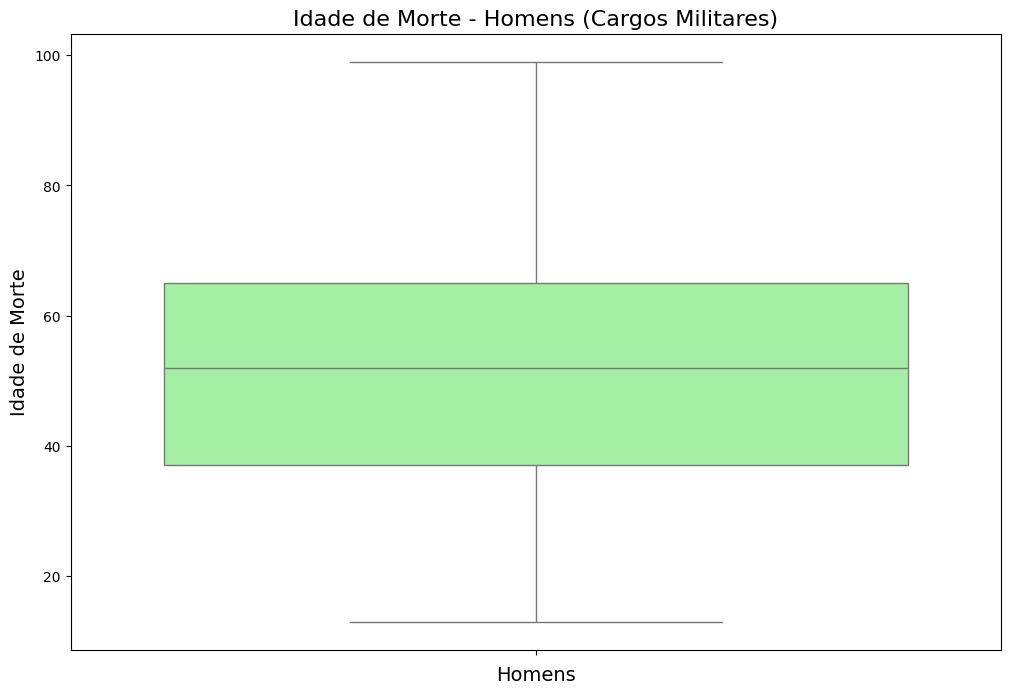

In [ ]:
# Criar o boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=masculino_militares, y='Age of death', color='#98FB98')
plt.title('Idade de Morte - Homens (Cargos Militares)', fontsize=16)
plt.ylabel('Idade de Morte', fontsize=14)
plt.xlabel('Homens', fontsize=14)

# Exibir o gráfico
#plt.tight_layout()
plt.show()

#### Boxplots Gênero Masculino - Com média, moda e mediana


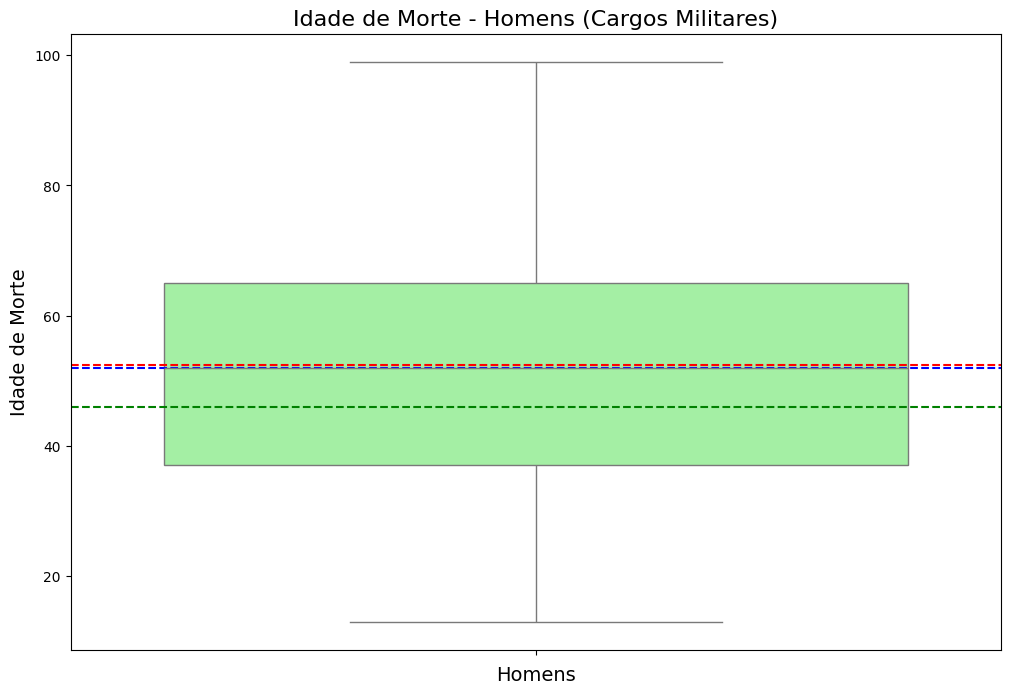

In [ ]:
# Criar o boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=masculino_militares, y='Age of death', color='#98FB98')
plt.title('Idade de Morte - Homens (Cargos Militares)', fontsize=16)
plt.ylabel('Idade de Morte', fontsize=14)
plt.xlabel('Homens', fontsize=14)

media_masculino = masculino_militares['Age of death'].mean()
moda_masculino = masculino_militares['Age of death'].mode()[0]
mediana_masculino = masculino_militares['Age of death'].median()

plt.axhline(media_masculino, color='red', linestyle='--', label=f'Média: {media_masculino:.2f}')
plt.axhline(moda_masculino, color='green', linestyle='--', label=f'Moda: {moda_masculino}')
plt.axhline(mediana_masculino, color='blue', linestyle='--', label=f'Mediana: {mediana_masculino}')


# Exibir o gráfico
#plt.tight_layout()
plt.show()

###2.2 Medidas de Centralidade


*   Média
*   Moda
*   Mediana






Média da Idade de Mortes (Feminino):

In [ ]:
media_feminino = feminino_militares['Age of death'].mean()
print(f"A média é: {media_feminino}")

A média é: 40.95774647887324


Média da Idade de Mortes (Masculino):

In [ ]:
media_masculino = masculino_militares['Age of death'].mean()
print(f"A média é: {media_masculino}")

A média é: 52.358417752050165


Moda da Idade de Mortes (Feminino):

In [ ]:
moda_feminino = stats.mode(feminino_militares['Age of death'])
print(f"A moda é: {moda_feminino}")

A moda é: ModeResult(mode=19.0, count=5)


Moda da Idade de Mortes (Masculino):

In [ ]:
moda_masculino = stats.mode(masculino_militares['Age of death'])
print(f"A moda é: {moda_masculino}")

A moda é: ModeResult(mode=46.0, count=46)


Mediana da Idade de Mortes (Feminino):

In [ ]:
mediana_feminino = feminino_militares['Age of death'].median()
print(f"A mediana é: {mediana_feminino}")

A mediana é: 37.0


Mediana da Idade de Mortes (Masculino):

In [ ]:
mediana_masculino = masculino_militares['Age of death'].median()
print(f"A mediana é: {mediana_masculino}")

A mediana é: 52.0


###2.3 Medidas de Variação


*   Desvio padrão
*   Amplitude interquartil



In [ ]:
militar['Age of death'].describe()

,Age of death
count,2145.000000
mean,51.989277
std,18.996499
min,13.000000
25%,36.000000
50%,51.000000
75%,65.000000
max,99.000000


Amplitude interquadril:

IQR = Q3 - Q1

IQR = 65 - 36

IQR = 29

##4. Formulação de Hipótese

###**Hipótese exploratória:** Homens que pertencem a cargos militares tendem a morrer mais novos que mulheres desses cargos.

###**Hipótese usando tabelas**: Criação de tabelas para comparação dos dados e apoio na hipótese exploratória.

##4. Conclusão




